# Hotel Booking Cancellation Prediction

## Table of Contents

1. [**Introduction**](#1.-Introduction)
2. [**Data Understanding**](#2.-Data-Understanding)
3. [**Data Preparation**](#3.-Data-Preparation)
4. [**Exploratory Data Analysis**](#4.-Exploratory-Data-Analysis)
    - Assumptions
    - Correlation Matrix
    - Validations
5. [**Data Preprocessing**](#5.-Data-Preprocessing)
    - Feature Engineering
    - Drop Unnecessary Columns
    - Data Encoding
    - Data Partitioning
    - Standardization
6. [**Modeling & Evaluation**](#6.-Modeling-&-Evaluation)
    - Logistic Regression
    - Random Forest
    - XGBoost
    - kNN
    - Feature Importances
8. [**Conclusion**](#8.-Conclusion)
    - Final Model Selection
    - Recommendations

#### 1.1 Background & Objective
Problem Statement
- In the hotel industry, unexpected cancellations of bookings cause lost revenue and disrupt operations. The goal is to develop a model that predicts if a hotel booking will be canceled. This model will consider factors like booking details, customer data, and past trends. Accurate predictions will help hotels manage their resources better, improve how they handle revenue, and offer better service to customers.

Stakeholders
- The main stakeholders are hotel management and staff. They are directly affected by booking cancellations and will use the model’s insights for decisions on room allocation, staffing, and overall operations.

Objective  
- The aim is to create a model that reliably predicts the likelihood of hotel booking cancellations. This will help in effectively managing bookings and ensuring optimal hotel occupancy. I will evaluate four different classification models to determine the most suitable one for our final use

#### 1.2 Dataset Description

The dataset, **hotel_bookings.csv**, consists of _119,390_ data points which contains various features.

<p>&nbsp;</p>

**Description of Attributes:** 

| Column                             | Description |  
| :----------------------            | :---------- |  
| hotel                              | H1 = Resort Hotel or H2 = City Hotel |  
| is_canceled                        | Value indicating if the booking was canceled (1) or not (0) |  
| lead_time                          | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date |  
| arrival_date_year                  | Year of arrival date |  
| arrival_date_month                 | Month of arrival date |  
| arrival_date_week_number           | Week number of year for arrival date |  
| arrival_date_day_of_mont           | Day of arrival date |  
| stays_in_weekend_nights            | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel |  
| stays_in_week_nights               | Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel |  
| adults                             | Number of adults |  
| children                           | Number of children |  
| babies                             | Number of babies |  
| meal                               | Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner) |  
| country                            | Country of origin. Categories are represented in the ISO 3155-3:2013 format |  
| market_segment                     | Market segment designation. In categories, the term "TA" means "Travel Agents" and "TO" means "Tour Operators" |  
| distribution_channel               | Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators" |  
| is_repeated_guest                  | repeated guest = 1, not = 0 |  
| previous_cancellations             | Number of precious bookings that were cancelled by the customer prior to the current booking |  
| previous_bookings_not_cancelled    | Number of precious bookings not cancelled by the customer prior to the current booking |  
| reserved_room_type                 | Code of room type reserved. Code is presented instead of designation for anonymity reasons |  
| assigned_room_type                 | Code for the type of room assigned to the booking. |  
| booking_changes                    | Number of changes/amendments made to the booking from the moment the booking was entered ont he PMS until the moment of check-in or cancellation |  
| deposit_type                       | No Deposit - no deposit was made, No Refund - a deposit was made in the value of total stay cost, Refundable - deposit was made with value under the total cost of stay  |  
| agent                              | ID of travel agency that made the booking |  
| company                            | ID of company/entity that made the booking or responsible for paying the booking. |  
| days_in_waiting_list               | Number of days the booking was in the waiting list before it was confirmed to the customer |  
| customer_type                      | Type of booking; Contract - when the booking has an allotment or other type of contract associated to it.; Group - when the booking is associated to a group; Transient - when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party - when booking is transient, but is associated to at least other transient booking |  
| adr                                | Average Daily Route as defined by dividing the sum of all lodging transactions by the total number of staying nights |  
| required_car_parking_spaces        | Number of car parking spaces required by the customer |  
| total_of_special_requests          | Number of special requests made by the customer (eg. twin bed or high floor) |  
| reservation_status                 | Reservation last status, assuming one of three categories; Canceled - booking was canceled by the customer; Check-Out - customer has checked in byt already departed; No-Show - customer did not check-in and did inform the hotel of the reason why |  
| reservation_status_date            | Date at which the last status was set. This can be used in conjunction with ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel |  



<p>&nbsp;</p>

**Acknowledgements:** 

This dataset is provided by _Jesse Mostipak_ and the original source can be found on [Kaggle](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand).

## 2. Data Understanding

#### Libraries Loading

In [95]:
!pip install xgboost

In [96]:
# data handling and analysis
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# model selection and training
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

#### Data Loading

In [98]:
# import dataset into pandas DataFrame
df = pd.read_csv("/Users/minjeongkim/Desktop/DataAnalysis/DataAnalysisProjects/06_hotel-booking-cancellation-prediction/hotel_bookings.csv")
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1


#### Basic Data Exploration

In [99]:
# check the dimensions of data structure
df.shape

(119390, 30)

In [100]:
# check the basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [101]:
# check the basic statistics for each feature
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [102]:
# check for missing values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

#### Observations: 

The dataset consists of both numerical and categorical columns. It contains many missing rows that need to be addressed in the next step, preliminary data cleaning.

Data types:
- **Categorical**: hotel, is_canceled, customer_type, is_repeated_guest, meal, country, market_segment, distribution_channel, reserved_room_type, assigned_room_type, deposit_type, agent, company, reservation_status,
- **Numerical**: lead_time, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, previous_cancellations, booking_changes, previous_bookings_not_canceled, days_in_waiting_list, adr, required_car_parking_spaces, total_of_special_requests
- **Ordinal**: arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, reservation_status_date

Missing values:
- `children`: 4 missing values
- `country`: 488 missing values
- `agent`: 16,340 missing values
- `company`: 112,593 missing values


## 3. Data Preparation

#### Preliminary Data Cleaning

In [103]:
# impute missing values with the mode
df['children'].fillna(df['children'].mode()[0], inplace=True)
df['country'].fillna(df['country'].mode()[0], inplace=True)
df['agent'].fillna(df['agent'].mode()[0], inplace=True)
df['company'].fillna(df['company'].mode()[0], inplace=True)

# confirm no missing values in any columns in dataset
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [104]:
# export cleaned dataset to csv file for submission
df.to_csv('cleaned_hotel_bookings.csv', index=True)

## 4. Exploratory Data Analysis

#### Assumptions

1. `hotel`: City hotels may experience higher cancellation rates than resort hotels due to the more spontaneous nature of city trips compared to the typically well-planned resort vacations.

2. `lead_time`: Longer lead times might be associated with higher cancellation rates, as plans are more subject to change over extended periods.

3. `arrival_date_year`, `arrival_date_month`, `arrival_date_week_number`: Seasonal trends in cancellations can be explored, with certain times of the year possibly showing higher rates due to factors like weather, holidays, or events.

4. `stays_in_weekend_nights` & `stays_in_week_nights`: The total length of stay could influence cancellation probabilities, with different trends for longer versus shorter stays.

5. `children`, `babies`: Bookings involving children and babies might see higher cancellation rates due to the unpredictability of traveling with young family members.

6. `meal`: Meal plan types could correlate with cancellation rates, where more comprehensive plans like Full Board might suggest stronger booking commitment.

7. `country`: Cancellation trends might vary by customer's country of origin, influenced by cultural, economic, or distance-related factors.

8. `market_segment` & `distribution_channel`: These factors could offer insights into customer booking behaviors and affect cancellation rates, such as differences between direct bookings and travel agency bookings.

9. `is_repeated_guest`: Repeat guests might be less likely to cancel, reflecting a commitment based on previous positive experiences with the hotel.

10. `previous_cancellations`: A history of previous cancellations might indicate a higher propensity to cancel future bookings.

11. `reserved_room_type` & `assigned_room_type`: Discrepancies between reserved and assigned room types could lead to higher cancellation rates due to guest dissatisfaction.

12. `booking_changes`: Frequent booking amendments might suggest indecision, potentially correlating with a greater likelihood of cancellation.

13. `deposit_type`: Non-refundable deposits could decrease cancellation rates as guests stand to incur financial losses.

14. `days_in_waiting_list`: Longer waiting times might increase cancellations due to frustration or changes in plans.

15. `customer_type`: Different customer types, such as groups or individuals, could have distinct cancellation probabilities.

16. `adr`: The Average Daily Rate's relationship with cancellations might be complex; higher rates could either lead to more cancellations due to cost or fewer due to the seriousness of the booking.

17. `total_of_special_requests`: More special requests could indicate a higher commitment level, potentially reducing the likelihood of cancellation.

#### Correlation Matrix

/var/folders/dd/28br3z0x5zqgpw2tllcv8gy00000gn/T/ipykernel_74756/3873852443.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


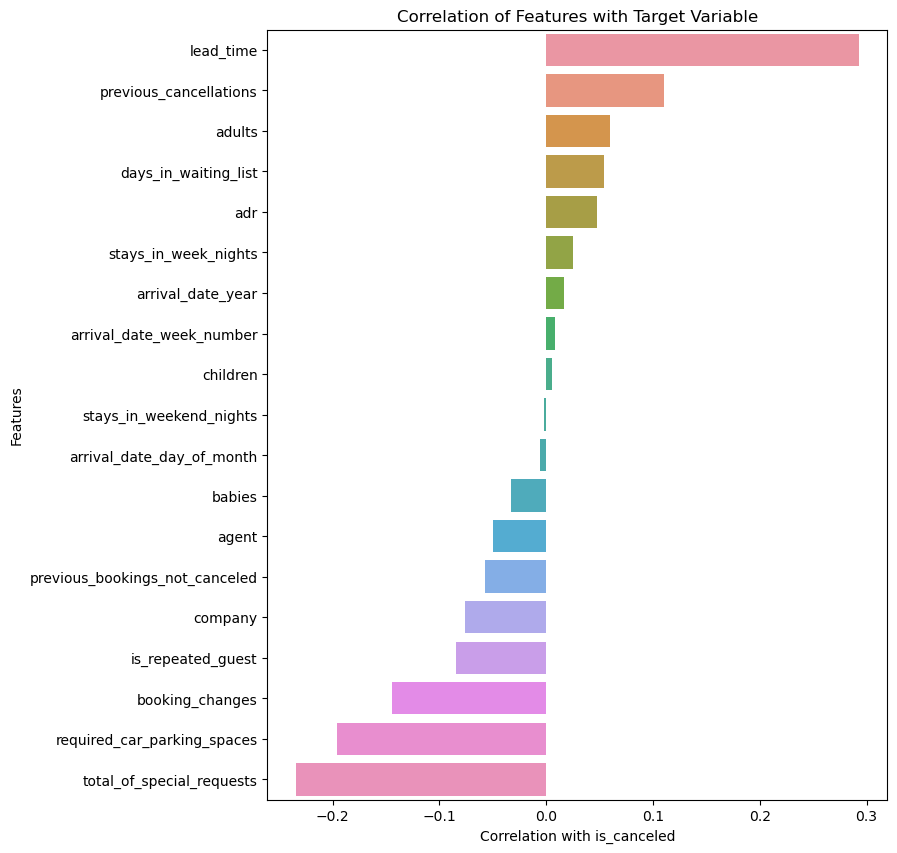

,Feature,Correlation_with_Target
1,lead_time,0.293123
2,previous_cancellations,0.110133
3,adults,0.060017
4,days_in_waiting_list,0.054186
5,adr,0.047557
6,stays_in_week_nights,0.024765
7,arrival_date_year,0.016660
8,arrival_date_week_number,0.008148
9,children,0.005036
10,stays_in_weekend_nights,-0.001791


In [10]:
# calculate the correlation matrix
correlation_matrix = df.corr()

# extract the correlation of features with the target variable 'is_canceled'
target_correlation = correlation_matrix['is_canceled'].sort_values(ascending=False)

# DataFrame for better visualization
target_correlation_df = pd.DataFrame(target_correlation).reset_index()
target_correlation_df.columns = ['Feature', 'Correlation_with_Target']

# remove the correlation of the target variable with itself
target_correlation_df = target_correlation_df[target_correlation_df['Feature'] != 'is_canceled']

# plot the correlations
plt.figure(figsize=(8, 10))
sns.barplot(y='Feature', x='Correlation_with_Target', data=target_correlation_df)
plt.title('Correlation of Features with Target Variable')
plt.xlabel('Correlation with is_canceled')
plt.ylabel('Features')
plt.show()

# display the DataFrame
target_correlation_df

##### Interpretation:
1. Top 3 Highest Positive Correlations:
    - lead_time
    - previous_cancellations
    - adults
2. Top 3 Highest Negative Correlations:
    - total_of_special_requests
    - required_car_parking_spaces
    - booking_changes

#### Validations

1. `hotel`: City hotels show a higher cancellation rate compared to resort hotels.

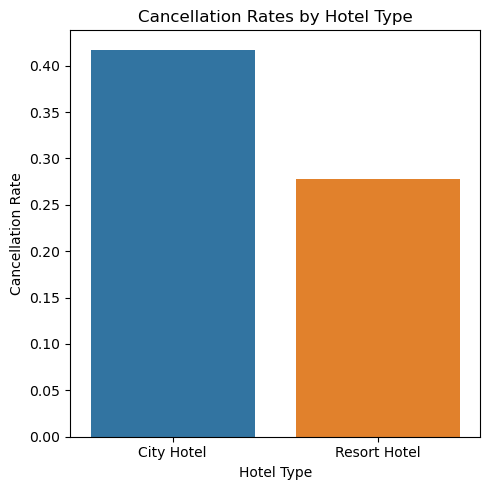

In [11]:
hotel_cancellation_rates = df.groupby('hotel')['is_canceled'].mean().reset_index()

plt.figure(figsize=(5, 5))
sns.barplot(x='hotel', y='is_canceled', data=hotel_cancellation_rates)
plt.title('Cancellation Rates by Hotel Type')
plt.ylabel('Cancellation Rate')
plt.xlabel('Hotel Type')
plt.tight_layout()
plt.show()

2. `lead_time`: There is a positive association between longer lead times and increased cancellation rates.

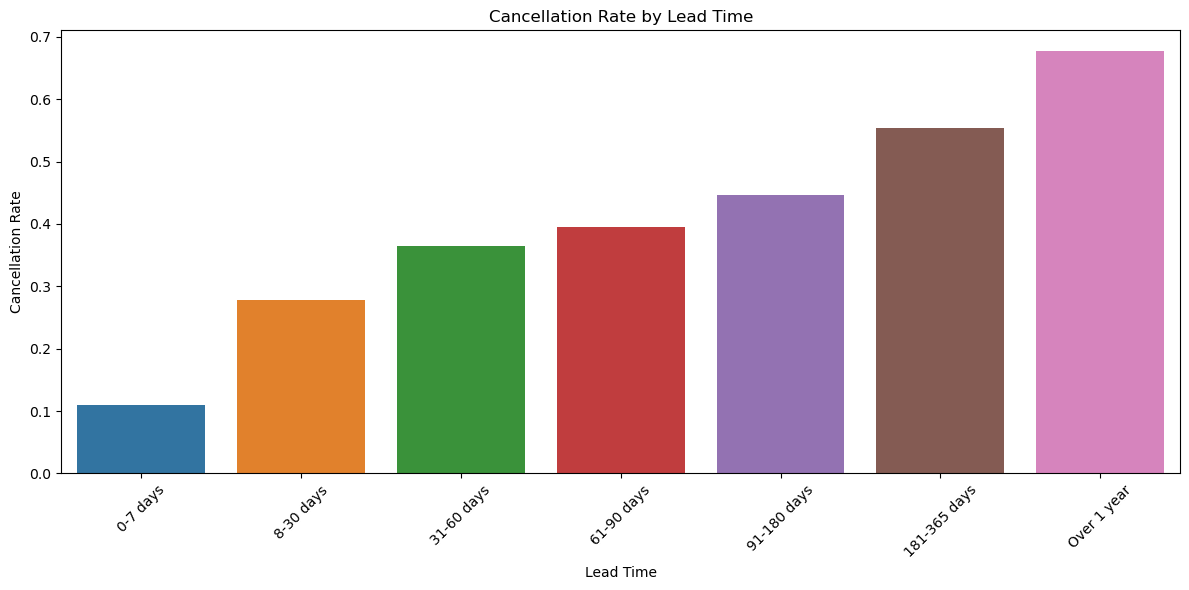

In [12]:
df['lead_time_bin'] = pd.cut(df['lead_time'], bins=[0, 7, 30, 60, 90, 180, 365, df['lead_time'].max()], labels=['0-7 days', '8-30 days', '31-60 days', '61-90 days', '91-180 days', '181-365 days', 'Over 1 year'])
lead_time_cancellation_rates = df.groupby('lead_time_bin')['is_canceled'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='lead_time_bin', y='is_canceled', data=lead_time_cancellation_rates)
plt.title('Cancellation Rate by Lead Time')
plt.xlabel('Lead Time')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

3. `arrival_date_year`, `arrival_date_month`, and `arrival_date_week_number`: No distinct seasonal patterns in cancellation rates were observed.

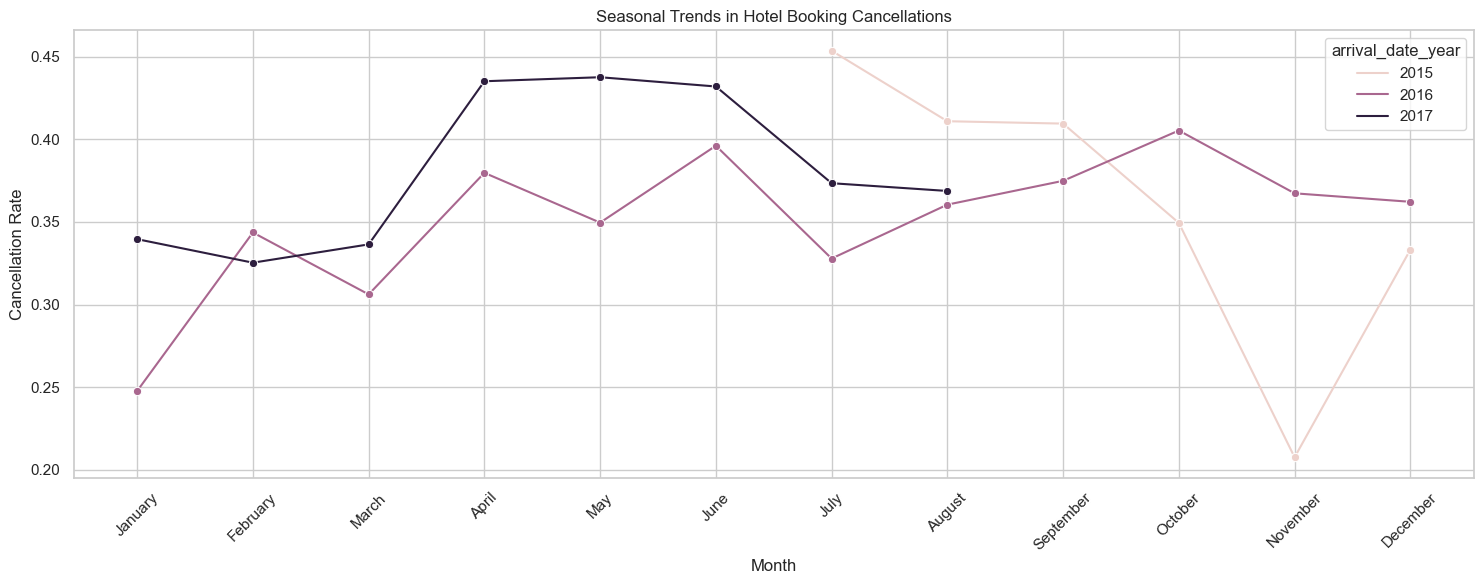

In [13]:
sns.set(style="whitegrid")

monthly_cancellation_rates = df.groupby(['arrival_date_year', 'arrival_date_month'])['is_canceled'].mean().reset_index()
months_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
monthly_cancellation_rates['arrival_date_month'] = pd.Categorical(monthly_cancellation_rates['arrival_date_month'], categories=months_order, ordered=True)
monthly_cancellation_rates.sort_values(by=['arrival_date_year', 'arrival_date_month'], inplace=True)

plt.figure(figsize=(15, 6))
sns.lineplot(x="arrival_date_month", y="is_canceled", hue="arrival_date_year", data=monthly_cancellation_rates, marker="o")
plt.title("Seasonal Trends in Hotel Booking Cancellations")
plt.xlabel("Month")
plt.ylabel("Cancellation Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

4. `stays_in_weekend_nights` & `stays_in_week_nights`: Longer the duration of stays, the higher the cancellation rate.

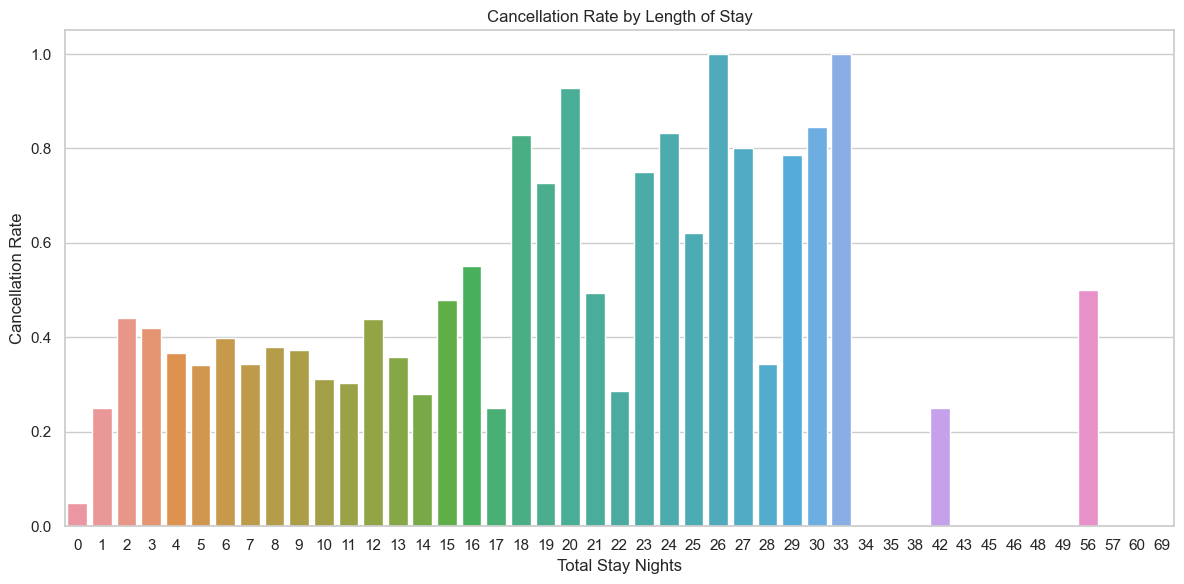

In [14]:
df['total_stay_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
stay_length_cancellation_rates = df.groupby('total_stay_nights')['is_canceled'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='total_stay_nights', y='is_canceled', data=stay_length_cancellation_rates)
plt.title('Cancellation Rate by Length of Stay')
plt.xlabel('Total Stay Nights')
plt.ylabel('Cancellation Rate')
plt.tight_layout()
plt.show()

5. `children`, `babies`: Bookings involving children and babies don't seem to affect the cancellation rate.

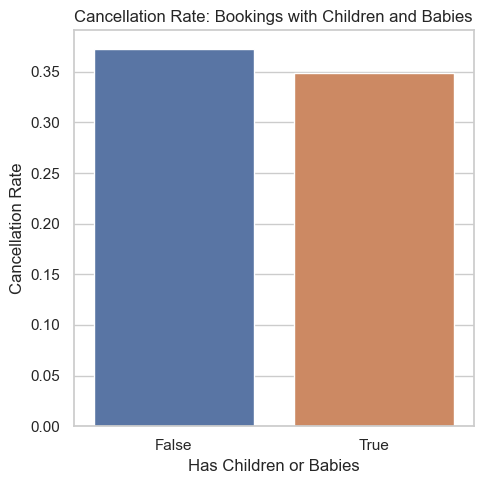

In [15]:
df['has_children_or_babies'] = (df['children'] > 0) | (df['babies'] > 0)
children_babies_cancellation_rates = df.groupby('has_children_or_babies')['is_canceled'].mean().reset_index()

plt.figure(figsize=(5, 5))
sns.barplot(x='has_children_or_babies', y='is_canceled', data=children_babies_cancellation_rates)
plt.title('Cancellation Rate: Bookings with Children and Babies')
plt.xlabel('Has Children or Babies')
plt.ylabel('Cancellation Rate')
plt.tight_layout()
plt.show()

6. `meal`: Interestingly, bookings with full board (breakfast, lunch, and dinner) exhibit higher cancellation rates.

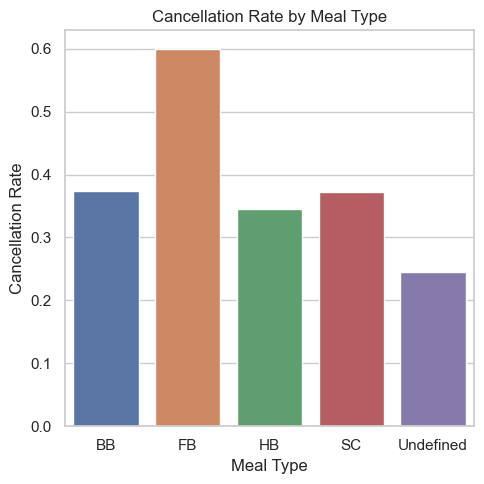

In [16]:
meal_cancellation_rates = df.groupby('meal')['is_canceled'].mean().reset_index()

plt.figure(figsize=(5, 5))
sns.barplot(x='meal', y='is_canceled', data=meal_cancellation_rates)
plt.title('Cancellation Rate by Meal Type')
plt.xlabel('Meal Type')
plt.ylabel('Cancellation Rate')
plt.tight_layout()
plt.show()

7. `country`: Guests from 'BRA', 'ITA', and 'PRT' show higher cancellation rates.

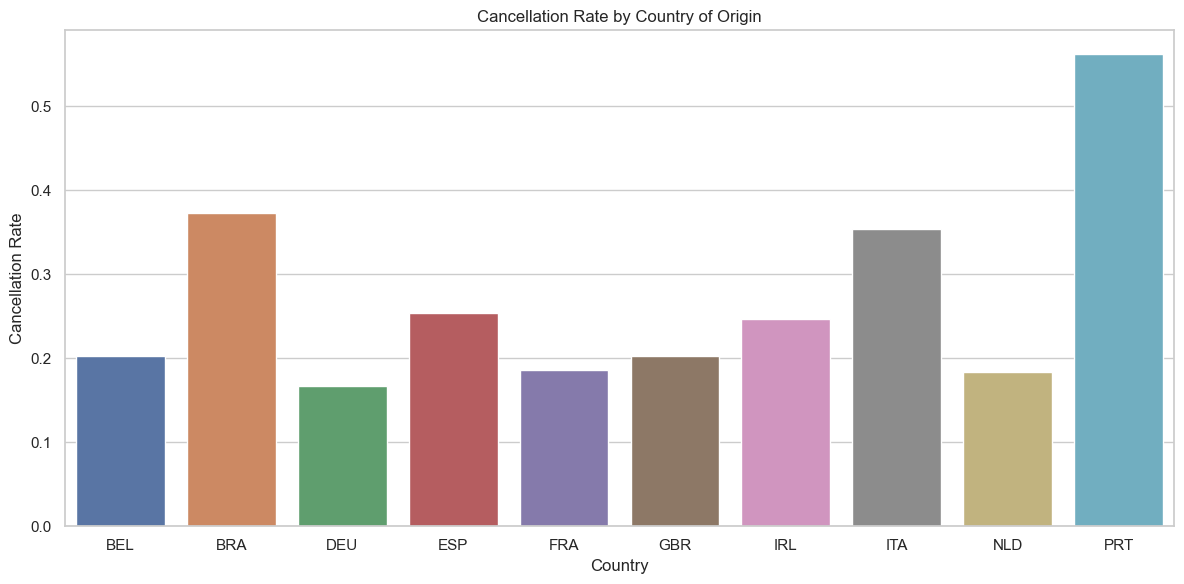

In [17]:
top_countries = df['country'].value_counts().nlargest(10).index
country_cancellation_rates = df[df['country'].isin(top_countries)].groupby('country')['is_canceled'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='is_canceled', data=country_cancellation_rates)
plt.title('Cancellation Rate by Country of Origin')
plt.xlabel('Country')
plt.ylabel('Cancellation Rate')
plt.tight_layout()
plt.show()

8. `marker_segment` & `distribution_channel`: 'Groups' in market segment and 'TA'/'TO' in distribution channel have higher cancellation rates.

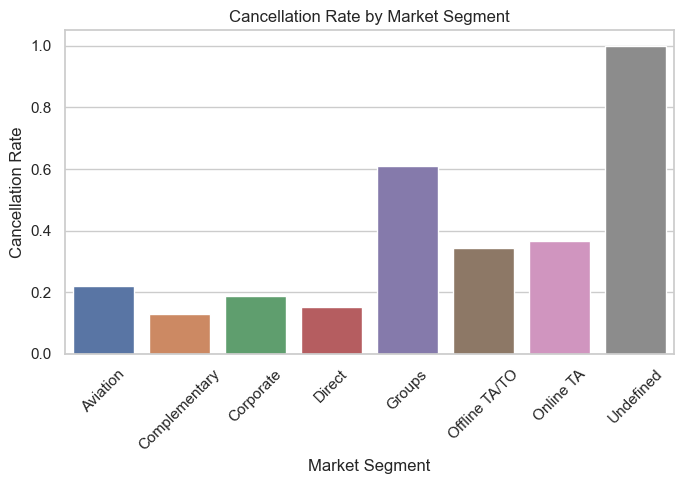

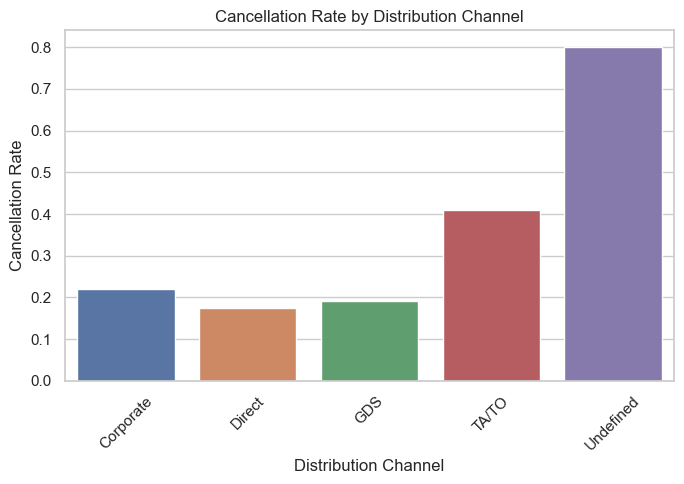

In [18]:
market_segment_cancellation_rates = df.groupby('market_segment')['is_canceled'].mean().reset_index()
distribution_channel_cancellation_rates = df.groupby('distribution_channel')['is_canceled'].mean().reset_index()

plt.figure(figsize=(7, 5))
sns.barplot(x='market_segment', y='is_canceled', data=market_segment_cancellation_rates)
plt.title('Cancellation Rate by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 5))
sns.barplot(x='distribution_channel', y='is_canceled', data=distribution_channel_cancellation_rates)
plt.title('Cancellation Rate by Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

9. `is_repeated_guest`: Repeat guests are less likely to cancel, while new customers have a higher cancellation likelihood.

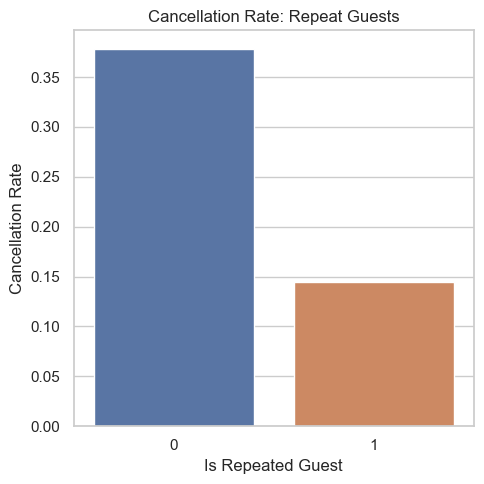

In [19]:
repeat_guest_cancellation_rates = df.groupby('is_repeated_guest')['is_canceled'].mean().reset_index()

plt.figure(figsize=(5, 5))
sns.barplot(x='is_repeated_guest', y='is_canceled', data=repeat_guest_cancellation_rates)
plt.title('Cancellation Rate: Repeat Guests')
plt.xlabel('Is Repeated Guest')
plt.ylabel('Cancellation Rate')
plt.tight_layout()
plt.show()

10. `previous_cancellations`: A complex relationship exists between previous cancellations and current booking cancellations, with inconsistent trends at different cancellation counts.

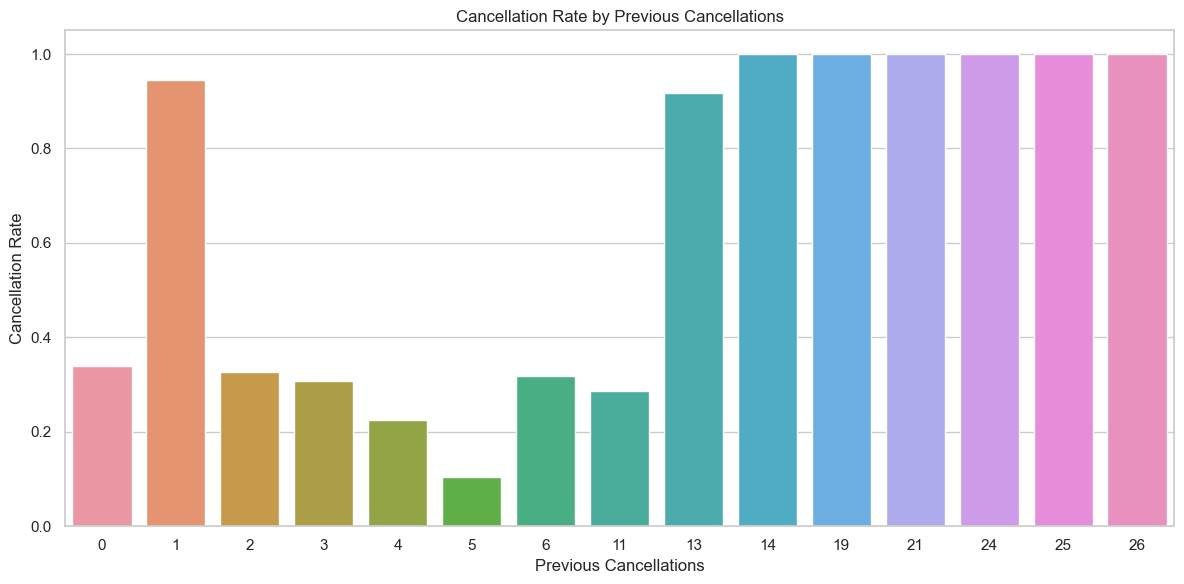

In [20]:
previous_cancellations_cancellation_rates = df.groupby('previous_cancellations')['is_canceled'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='previous_cancellations', y='is_canceled', data=previous_cancellations_cancellation_rates)
plt.title('Cancellation Rate by Previous Cancellations')
plt.xlabel('Previous Cancellations')
plt.ylabel('Cancellation Rate')
plt.tight_layout()
plt.show()

11. `reserved_room_type` & `assigned_room_type`: Discrepancies in reserved and assigned room types doesn't lead to higher cancellation rates.

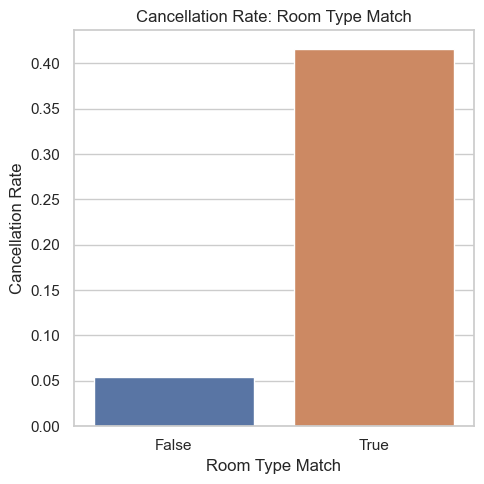

In [21]:
df['room_type_match'] = df['reserved_room_type'] == df['assigned_room_type']
room_type_cancellation_rates = df.groupby('room_type_match')['is_canceled'].mean().reset_index()

plt.figure(figsize=(5, 5))
sns.barplot(x='room_type_match', y='is_canceled', data=room_type_cancellation_rates)
plt.title('Cancellation Rate: Room Type Match')
plt.xlabel('Room Type Match')
plt.ylabel('Cancellation Rate')
plt.tight_layout()
plt.show()

12. `booking_changes`: There is no clear evidence that frequent booking changes correlate with higher cancellation rates.

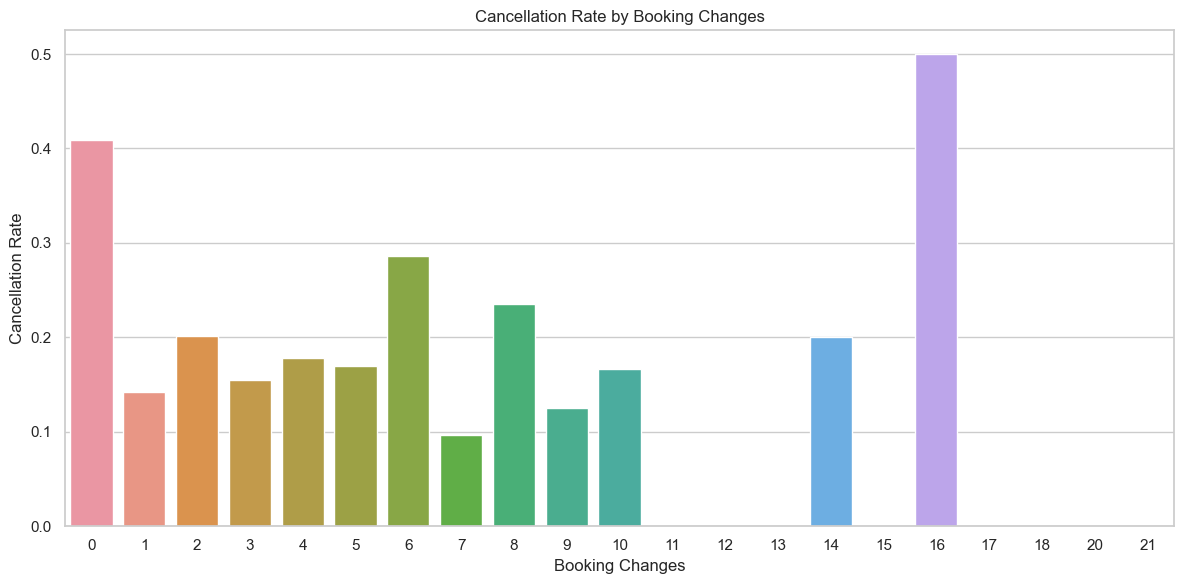

In [22]:
booking_changes_cancellation_rates = df.groupby('booking_changes')['is_canceled'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='booking_changes', y='is_canceled', data=booking_changes_cancellation_rates)
plt.title('Cancellation Rate by Booking Changes')
plt.xlabel('Booking Changes')
plt.ylabel('Cancellation Rate')
plt.tight_layout()
plt.show()

13. `deposit_type`: Bookings with non-refundable deposits tend to have higher cancellation rates.

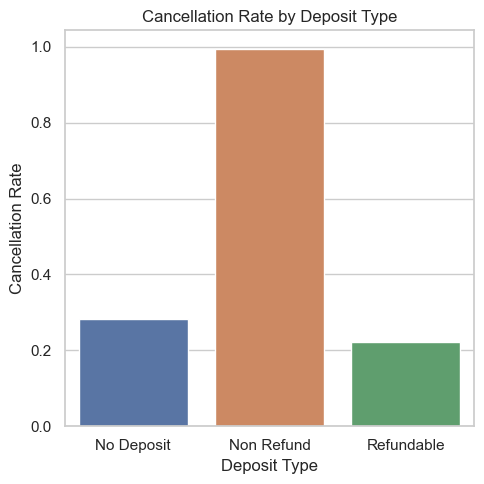

In [23]:
deposit_cancellation_rates = df.groupby('deposit_type')['is_canceled'].mean().reset_index()

plt.figure(figsize=(5, 5))
sns.barplot(x='deposit_type', y='is_canceled', data=deposit_cancellation_rates)
plt.title('Cancellation Rate by Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('Cancellation Rate')
plt.tight_layout()
plt.show()

14. `days_in_waiting_list`: The duration on the waiting list does not appear to impact cancellation rates.

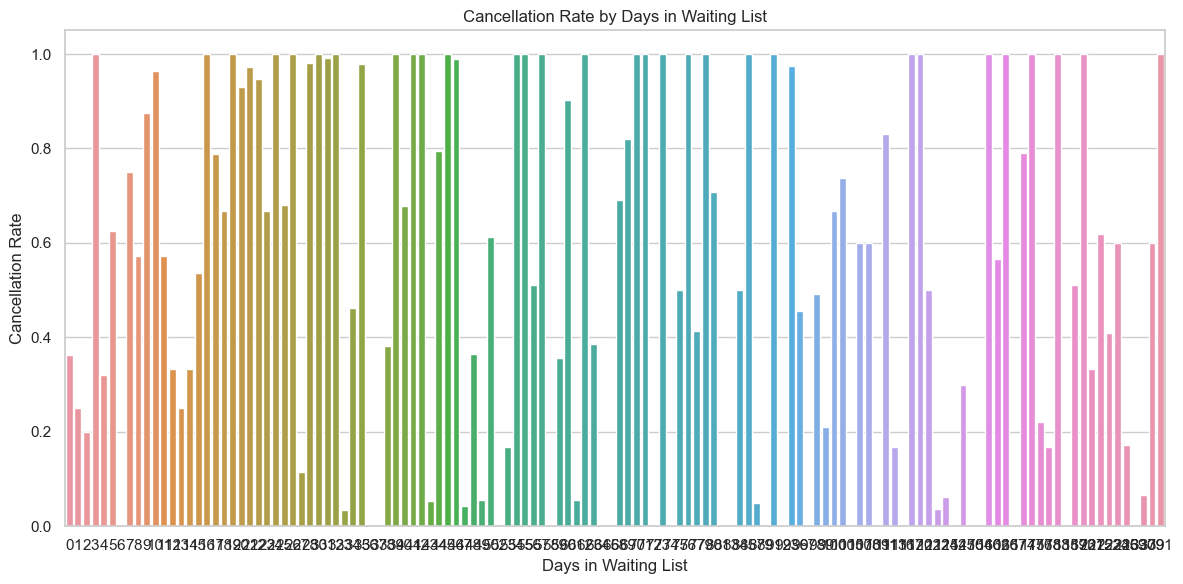

In [24]:
waiting_list_cancellation_rates = df.groupby('days_in_waiting_list')['is_canceled'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='days_in_waiting_list', y='is_canceled', data=waiting_list_cancellation_rates)
plt.title('Cancellation Rate by Days in Waiting List')
plt.xlabel('Days in Waiting List')
plt.ylabel('Cancellation Rate')
plt.tight_layout()
plt.show()


15. `customer_type`: 'Transient' bookings (not part of a group or contract) are more likely to be canceled.

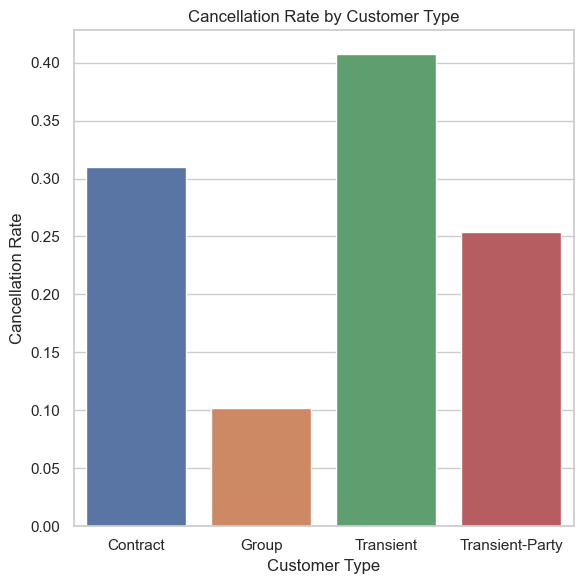

In [25]:
customer_type_cancellation_rates = df.groupby('customer_type')['is_canceled'].mean().reset_index()

plt.figure(figsize=(6, 6))
sns.barplot(x='customer_type', y='is_canceled', data=customer_type_cancellation_rates)
plt.title('Cancellation Rate by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Cancellation Rate')
plt.tight_layout()
plt.show()

16. `adr`: Higher ADR is associated with an increased likelihood of cancellation.

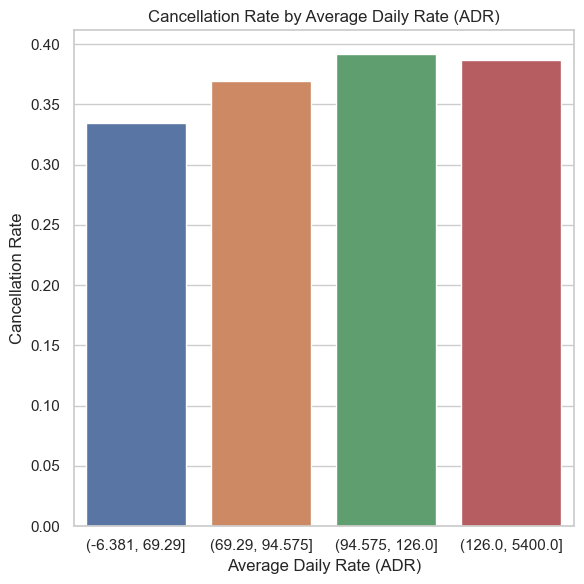

In [26]:
df['adr_bin'] = pd.qcut(df['adr'], q=4)  # quantile binning of ADR
adr_cancellation_rates = df.groupby('adr_bin')['is_canceled'].mean().reset_index()

plt.figure(figsize=(6, 6))
sns.barplot(x='adr_bin', y='is_canceled', data=adr_cancellation_rates)
plt.title('Cancellation Rate by Average Daily Rate (ADR)')
plt.xlabel('Average Daily Rate (ADR)')
plt.ylabel('Cancellation Rate')
plt.tight_layout()
plt.show()

17. `total_of_special_requests`: A higher number of special requests is linked to a lower probability of cancellation.

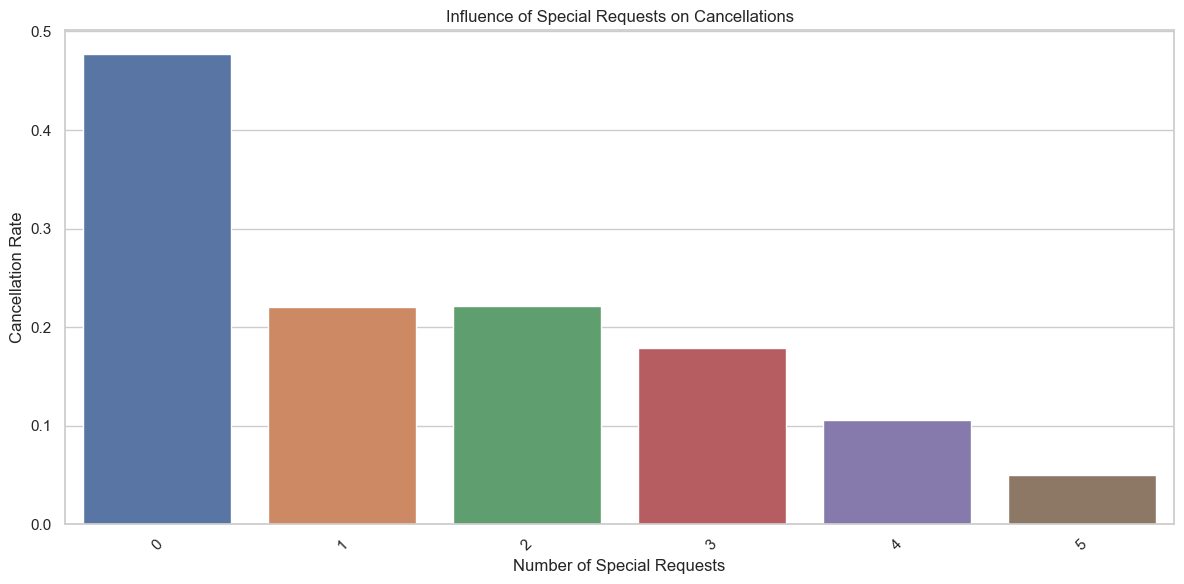

In [27]:
special_requests_cancellation_rates = df.groupby('total_of_special_requests')['is_canceled'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='total_of_special_requests', y='is_canceled', data=special_requests_cancellation_rates)
plt.title("Influence of Special Requests on Cancellations")
plt.xlabel("Number of Special Requests")
plt.ylabel("Cancellation Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
# list of columns for dropping after eda
eda_columns = ['lead_time_bin', 'total_stay_nights', 'has_children_or_babies', 'room_type_match', 'adr_bin']

# drop columns only if they exist in the DataFrame
df = df.drop([col for col in eda_columns if col in df.columns], axis=1)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,9.0,40.0,0,Transient,0.0,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,9.0,40.0,0,Transient,0.0,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,9.0,40.0,0,Transient,75.0,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,304.0,40.0,0,Transient,75.0,0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,240.0,40.0,0,Transient,98.0,0,1


## 5. Data Preprocessing

#### Feature Engineering

In [105]:
# add stays_in_weekend_nights and stays_in_week_nights and make it into total stay duration
df['total_stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# add adults, children, and babies and make it as total guests
df['total_children'] = df['children'].fillna(0) + df['babies'].fillna(0)

# create binary feature indicates whether there was a change in room type (1 different, 0 the same)
df['room_type_change'] = (df['reserved_room_type'] != df['assigned_room_type']).astype(int)

# create total bookings column
df['total_bookings'] = df['previous_cancellations'] + df['previous_bookings_not_canceled']

#### Drop Unnecessary Columns

In [106]:
original_columns_to_drop = ['stays_in_weekend_nights', 'stays_in_week_nights', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled']

df = df.drop(original_columns_to_drop, axis=1)

#### Data Encoding

In [107]:
# identify binary and multi-class categorical variables
binary_variables = [col for col in df.columns if df[col].nunique() == 2 and df[col].dtype == 'object']
multiclass_variables = [col for col in df.columns if df[col].nunique() > 2 and df[col].dtype == 'object']

binary_variables, multiclass_variables

(['hotel'],
 ['arrival_date_month',
  'meal',
  'country',
  'market_segment',
  'distribution_channel',
  'reserved_room_type',
  'assigned_room_type',
  'deposit_type',
  'customer_type'])

In [108]:
# label encoding for binary variables
label_encoder = LabelEncoder()
df['hotel'] = label_encoder.fit_transform(df['hotel'])

# one-hot encoding for multi-class Variables
df = pd.get_dummies(df, columns=multiclass_variables)

#### Data Partitioning

In [109]:
# split the dataset into training and testing sets
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Standardization

In [110]:
# select numerical variables
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
# standardize the numerical features
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

## 6. Modeling & Evaluation

#### Logistic Regression

In [35]:
# set up the Logistic Regression model and hyperparameters
param_grid_logreg = {'C': [0.1, 1, 10], 'solver': ['liblinear']}
grid_logreg = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid_logreg, cv=3, scoring='f1')
grid_logreg.fit(X_train, y_train)

# retrieve the best parameters
best_params_logreg = grid_logreg.best_params_
print("Best parameters for Logistic Regression:", best_params_logreg)

# retrain with the best parameters
best_logreg_model = LogisticRegression(**best_params_logreg, max_iter=1000, random_state=42)
best_logreg_model.fit(X_train, y_train)

# predictions and performance evaluation
y_pred_logreg = best_logreg_model.predict(X_test)
class_report_logreg = classification_report(y_test, y_pred_logreg, output_dict=True)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

# convert to DataFrame
class_report_logreg_df = pd.DataFrame(class_report_logreg).transpose()
conf_matrix_logreg_df = pd.DataFrame(conf_matrix_logreg, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

print("Classification Report for Logistic Regression:\n", class_report_logreg_df)
print("\nConfusion Matrix for Logistic Regression:\n", conf_matrix_logreg_df)

Best parameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
Classification Report for Logistic Regression:
               precision    recall  f1-score       support
0              0.820450  0.904273  0.860325  14907.000000
1              0.808405  0.671163  0.733419   8971.000000
accuracy       0.816693  0.816693  0.816693      0.816693
macro avg      0.814428  0.787718  0.796872  23878.000000
weighted avg   0.815925  0.816693  0.812646  23878.000000

Confusion Matrix for Logistic Regression:
                  Predicted Negative  Predicted Positive
Actual Negative               13480                1427
Actual Positive                2950                6021


#### Random Forest

In [36]:
# set up the Random Forest model and hyperparameters
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [10, 20], 'min_samples_split': [2, 5]}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring='f1')
grid_rf.fit(X_train, y_train)

# retrieve the best parameters
best_params_rf = grid_rf.best_params_
print("Best parameters for Random Forest:", best_params_rf)

# retrain with the best parameters
best_rf_model = RandomForestClassifier(**best_params_rf, random_state=42)
best_rf_model.fit(X_train, y_train)

# predictions and performance evaluation
y_pred_rf = best_rf_model.predict(X_test)
class_report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# convert to DataFrame
class_report_rf_df = pd.DataFrame(class_report_rf).transpose()
conf_matrix_rf_df = pd.DataFrame(conf_matrix_rf, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

print("Classification Report for Random Forest:\n", class_report_rf_df)
print("\nConfusion Matrix for Random Forest:\n", conf_matrix_rf_df)

Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Classification Report for Random Forest:
               precision    recall  f1-score       support
0              0.861964  0.954250  0.905762  14907.000000
1              0.907525  0.746071  0.818916   8971.000000
accuracy       0.876037  0.876037  0.876037      0.876037
macro avg      0.884745  0.850160  0.862339  23878.000000
weighted avg   0.879082  0.876037  0.873134  23878.000000

Confusion Matrix for Random Forest:
                  Predicted Negative  Predicted Positive
Actual Negative               14225                 682
Actual Positive                2278                6693


#### XGBoost

In [111]:
# set up the XGBoost model and hyperparameters
param_grid_xgb = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]}
grid_xgb = GridSearchCV(XGBClassifier(random_state=42), param_grid_xgb, cv=3, scoring='f1', verbose=1)
grid_xgb.fit(X_train, y_train)

# retrieve the best parameters
best_params_xgb = grid_xgb.best_params_
print("Best parameters for XGBoost:", best_params_xgb)

# retrain with the best parameters
best_xgb_model = XGBClassifier(**best_params_xgb, random_state=42)
best_xgb_model.fit(X_train, y_train)

# predictions and performance evaluation
y_pred_xgb = best_xgb_model.predict(X_test)
class_report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# convert to DataFrame
class_report_xgb_df = pd.DataFrame(class_report_xgb).transpose()
conf_matrix_xgb_df = pd.DataFrame(conf_matrix_xgb, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

print("Classification Report for XGBoost:\n", class_report_xgb_df)
print("\nConfusion Matrix for XGBoost:\n", conf_matrix_xgb_df)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
Classification Report for XGBoost:
               precision    recall  f1-score       support
0              0.901124  0.925002  0.912907  14907.000000
1              0.869636  0.831345  0.850060   8971.000000
accuracy       0.889815  0.889815  0.889815      0.889815
macro avg      0.885380  0.878174  0.881483  23878.000000
weighted avg   0.889294  0.889815  0.889295  23878.000000

Confusion Matrix for XGBoost:
                  Predicted Negative  Predicted Positive
Actual Negative               13789                1118
Actual Positive                1513                7458


#### kNN

In [38]:
# set up the kNN model and hyperparameters
param_grid_knn = {'n_neighbors': [5, 7], 'weights': ['uniform']}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, scoring='f1')
grid_knn.fit(X_train, y_train)

# retrieve the best parameters
best_params_knn = grid_knn.best_params_
print("Best parameters for KNN:", best_params_knn)

# retrain with the best parameters
best_knn_model = KNeighborsClassifier(**best_params_knn)
best_knn_model.fit(X_train, y_train)

# predictions and performance evaluation
y_pred_knn = best_knn_model.predict(X_test)
class_report_knn = classification_report(y_test, y_pred_knn, output_dict=True)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# convert to DataFrame
class_report_knn_df = pd.DataFrame(class_report_knn).transpose()
conf_matrix_knn_df = pd.DataFrame(conf_matrix_knn, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

print("Classification Report for kNN:\n", class_report_knn_df)
print("\nConfusion Matrix for kNN:\n", conf_matrix_knn_df)

Best parameters for KNN: {'n_neighbors': 5, 'weights': 'uniform'}
Classification Report for kNN:
               precision    recall  f1-score       support
0              0.867600  0.880928  0.874214  14907.000000
1              0.796957  0.776614  0.786654   8971.000000
accuracy       0.841737  0.841737  0.841737      0.841737
macro avg      0.832279  0.828771  0.830434  23878.000000
weighted avg   0.841060  0.841737  0.841317  23878.000000

Confusion Matrix for kNN:
                  Predicted Negative  Predicted Positive
Actual Negative               13132                1775
Actual Positive                2004                6967


In [130]:
#### Feature Importances

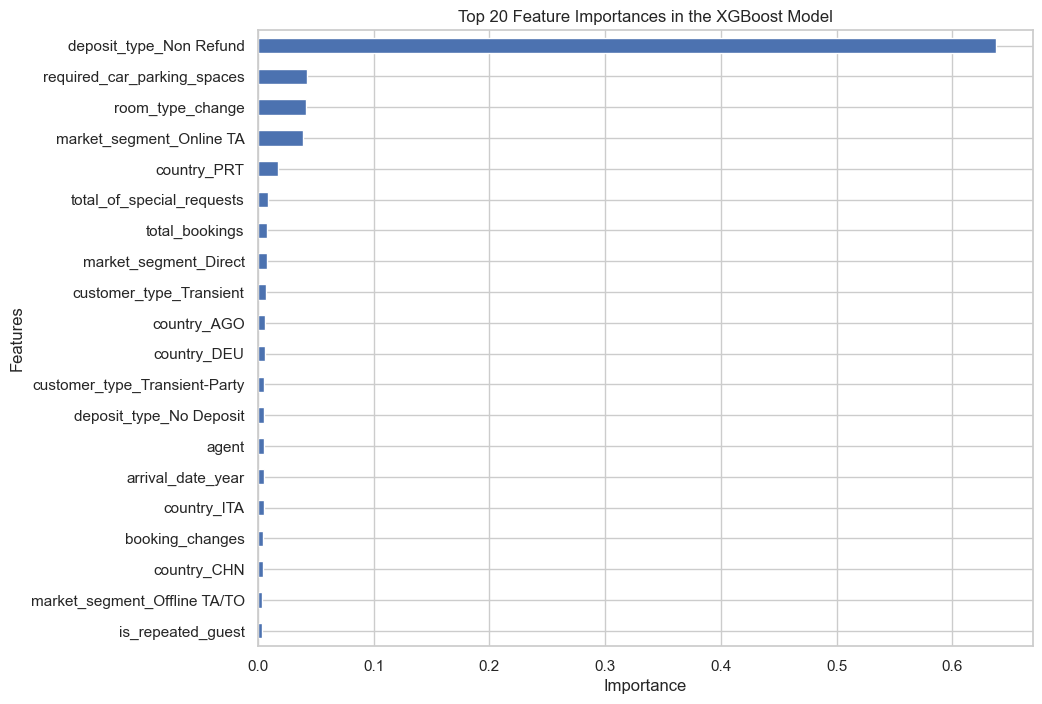

In [129]:
importances = best_xgb_model.feature_importances_
feature_importances_series = pd.Series(importances, index=X_train.columns)
top_20_feature_importances = feature_importances_series.sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
top_20_feature_importances.plot(kind='barh', title='Top 20 Feature Importances in the XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.show()

## 7. Conclusion

#### Final Model Selection

**XGBoost** as the Final Model Choice
1. **High Overall Accuracy**: With an accuracy of about 89%, XGBoost demonstrates a strong capability in accurately predicting both cancellations and non-cancellations of hotel bookings.

2. **Balanced Performance Across Classes**: The model excels in precision and recall for class 1 (cancellations), which is vital for our goals. It also shows excellent performance for class 0 (non-cancellations).

3. **Confusion Matrix Insights**: The model achieves a well-balanced outcome, with a high count of true positives and true negatives, along with relatively fewer false negatives and positives. This is particularly important as it reduces the risk of mistakenly predicting a booking will not be canceled when it actually might be (false negatives), and the opposite scenario as well.

#### Recommendations

1. **Implement Dynamic Pricing Strategies**: Utilize the model's predictions to adjust pricing dynamically. Higher-risk bookings that are likely to be canceled can be priced differently to mitigate potential revenue loss.

2. **Optimize Overbooking Practices**: With reliable predictions on cancellations, overbooking strategies can be refined to maximize occupancy without compromising guest experience.

3. **Tailor Marketing and Promotions**: Use insights from the model to target specific customer segments with personalized offers, potentially reducing cancellation rates.

4. **Regular Model Re-evaluation**: Continuously monitor the model's performance and retrain it with recent data to ensure its predictions remain accurate over time.